In [10]:
## importations
import random as r
import numpy as np
import math as m
import scipy.linalg as spl # in order to solve Ax=b
import matplotlib.pyplot as plt 
from scipy.sparse import csr_matrix

# # Création d'une matrice définie positive (matrice SDP)
    # n : taille de la matrice
    # nb_extra_diag: nombre d'extra-diagonales non égal à zéro
def matrice_SDP(n, nb_extra_diag):
    A = np.zeros([n, n])
    coord = []
    for i in range(0, n, 1):
        for j in range(0, i, 1):
            coord.append([i, j])
    for i in range(0, nb_extra_diag, 1):
        c = r.randint(0, len(coord)-1)
        val = r.randint(0,50)
        A[coord[c][0]][coord[c][1]] = val
        A[coord[c][1]][coord[c][0]] = val
        del coord[c]
    for i in range(0, n, 1):
        s = 0
        for j in range(0, n, 1):
            s = s + A[i][j]
        A[i][i] = r.randint(s + 1, 2 * s +1)
    return A







def matriceA_SDP(n, nb_extra_diag):
    A = np.zeros([n, n])
    
    for i in range(0,n) :
        
        if i < n :
            A[i - 1, i] = -1
            A[(i-n) + 1, i] = -1
            A[0,n-1] =0
            A[n-1,0] =0
    print("\n Entrer les élements du diagonal :\n ")
    for i in range(0, nb_extra_diag, 1):
        A[i][i]= int(input(""))
  
    return A









## Création d'un vecteur aléatoire de taille n, avec une valeur comprise entre 0 et 50.
def random_vector(n):
    B = np.zeros((n,1))
    for i in range(0,n,1):
        B[i][0] = r.randint(0,50)
    return B







## vérifier si la matrice est définie positive
def is_symdefpos(M):
    # vérifier si M est symétrique : si AT = A
    for i in range(np.shape(M)[0]):
        for j in range(np.shape(M)[1]):
            if (M[i][j] != M[j][i]):
                return False

    # vérifier si M est définie positif : si toutes ses valeurs propres sont strictement positives.
    if not (  np.all(np.linalg.eigvals(M) > 0)):
      return False

    # vérifier si M est inversible : si det !=0
    if spl.det(M) == 0:
        return False

    return True






## gradient conjugé
def conjgrad(A,b,X,imax,p):
    if (is_symdefpos(A) == False):
        # vérifier si A est SDP
        print("\n A n'est pas symétrique définie positive")
        return np.zeros((np.shape(A)[0],1))
    R = b - A.dot(X)
    P = R
    rs_old = np.transpose(R).dot(R)
    for i in range(1, imax + 1):
        Ap = A.dot(P)
        alpha = rs_old / np.transpose(P).dot(Ap)
        X = X + (alpha * P)
        R = R - (alpha * Ap)
        rs_new = np.transpose(R).dot(R)
        if (m.sqrt(rs_new) < p):
            break
        P = R + (rs_new/rs_old) * P
        rs_old = rs_new
    print("\n R = \n", R)
    print("\n X = \n", X)
    return X





## fonction test
def test_conjgrad():
        
# initialiser la matrice de test
    
    
    A = np.array([[3.,-1.,0.,0.,0.],[-1.,12.,-1.,0.,0.],[0.,-1.,24.,-1.,0.],[0.,0.,-1.,48.,-1.],[0.,0.,0.,-1.,96.]])
    print("A= \n", A, "\n Dimension de A: ", np.shape(A))
    b = np.array([[1.],[2.],[3.],[4.],[5.]])
    print("B = \n", b, "\n Dimension de b: ", np.shape(b))
    Xzero = np.array([[0.],[0.],[0.],[0.],[0.]]) # initialized null 5-dimensioned vector
    imax = 10**3
    p = 10**(-5)
    print("\n Précision à ",p," près \n")
    X_sol = conjgrad(A, b, Xzero, imax, p)
    print("\n Avec la méthode du gradient conjugué on a \n X = \n", X_sol)
    
    #on va vérifier notre solution
    X_solve = spl.solve(A, b)
    print("\n Avec la fonction solve de la biliothèque scipy.linalg on a \n X = \n", X_solve) 
    print("\n Test avec une matrice générée par la fonction matrice_SDP : \n")

    print(" - Entrer 1 si vous voulez de saisir une fonction quadratique \n - Entrer 2 si vous voulez une matrice aléatoire avec taille et nombre d'elements extra-diagonaux saisies (Default)") 
    choix = int(input())
    matrix_size = int(input("Entrer la taille de la matrice A: "))
    nbr_extra_diag = int(input("Ainsi que le nombre d'elements extra-diagonaux de A: "))
    if (choix==1):
      A = matriceA_SDP(matrix_size, nbr_extra_diag)
    else:
      A = matrice_SDP(matrix_size, nbr_extra_diag)
        
    b = random_vector(matrix_size)
    Xzero = np.zeros((matrix_size,1))
    X_sol = conjgrad(A, b, Xzero, imax, p)

     #on va vérifier notre solution
    X_solve = spl.solve(A, b)
    print("\n Avec la fonction solve de la biliothèque scipy.linalg on a \n X = \n", X_solve) 

    print("\n A = \n", A)
    print("\n b = \n", b)
    print("\n Xzero = \n", Xzero)
    print("\n X_solve = \n", X_sol)
        

In [11]:
test_conjgrad()

A= 
 [[ 3. -1.  0.  0.  0.]
 [-1. 12. -1.  0.  0.]
 [ 0. -1. 24. -1.  0.]
 [ 0.  0. -1. 48. -1.]
 [ 0.  0.  0. -1. 96.]] 
 Dimension de A:  (5, 5)
B = 
 [[1.]
 [2.]
 [3.]
 [4.]
 [5.]] 
 Dimension de b:  (5, 1)

 Précision à  1e-05  près 


 R = 
 [[-1.11022302e-16]
 [ 2.22044605e-16]
 [-6.10622664e-16]
 [ 5.07233144e-15]
 [ 3.24675183e-14]]

 X = 
 [[0.40392748]
 [0.21178244]
 [0.13746182]
 [0.08730114]
 [0.05299272]]

 Avec la méthode du gradient conjugué on a 
 X = 
 [[0.40392748]
 [0.21178244]
 [0.13746182]
 [0.08730114]
 [0.05299272]]

 Avec la fonction solve de la biliothèque scipy.linalg on a 
 X = 
 [[0.40392748]
 [0.21178244]
 [0.13746182]
 [0.08730114]
 [0.05299272]]

 Test avec une matrice générée par la fonction matrice_SDP : 

 - Entrer 1 si vous voulez de saisir une fonction quadratique 
 - Entrer 2 si vous voulez une matrice aléatoire avec taille et nombre d'elements extra-diagonaux saisies (Default)
1
Entrer la taille de la matrice A: 2
Ainsi que le nombre d'elements ext

Entrer fonction:x**2


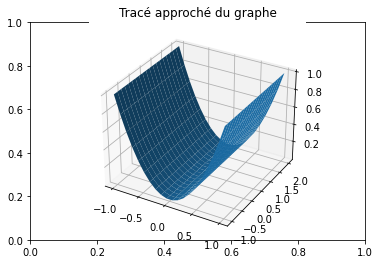

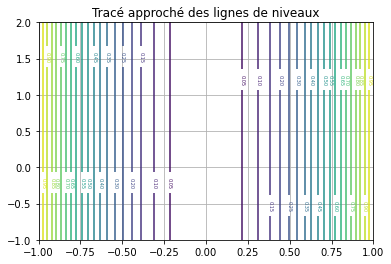

In [12]:
import numpy as np
import matplotlib.pyplot as plt
#utilisez intervalle  dans R2 [ax,bx][ay,by]
def GrapheLN(ax,bx,ay,by,N):
    # Si vous voulez utiliser sin,cos,exp etc ... utlisez numpy exemple : np.sin(x+y)
    f=eval('lambda x,y: ' + input("Entrer fonction:"))
    X, Y = np.meshgrid(np.linspace(ax,bx,N), np.linspace(ay,by,N))
    Z = f(X,Y)
    plt.figure(1)
    plt.title("Tracé approché du graphe")
    ax = plt.axes(projection='3d')
    ax.plot_surface(X,Y,Z)
    plt.figure(2)
    graphe = plt.contour(X,Y,Z,N)
    plt.clabel(graphe,inline=1,fontsize=5,fmt='%3.2f')
    plt.title("Tracé approché des lignes de niveaux")
    plt.grid()
    plt.show()
GrapheLN(-1,1,-1,2,20)

Choix de la fonction a effectuer :
1: (x-1)^2 +(y-4)^2 
2: x^2 + y^4
3: Fonction de Rosenbrock
4: Entrer une fonction à votre choix
0: Quitter le programme

5 -->1


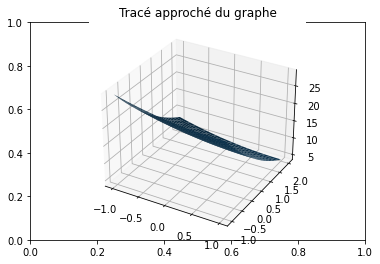

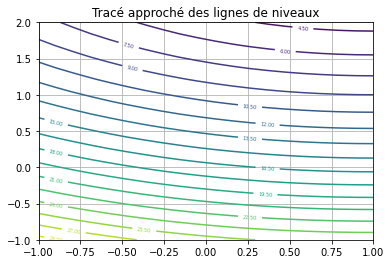

KeyboardInterrupt: Interrupted by user

In [15]:
import numpy as np
import matplotlib.pyplot as plt
def GrapheLN(ax,bx,ay,by,N):
    X, Y = np.meshgrid(np.linspace(ax, bx, N), np.linspace(ay, by, N))
    choix = print('Choix de la fonction a effectuer :\n'
                 '1: (x-1)^2 +(y-4)^2 \n'
                 '2: x^2 + y^4\n'
                 '3: Fonction de Rosenbrock\n'
                 '4: Entrer une fonction à votre choix\n'
                 '0: Quitter le programme\n')
    while (choix!='0'):
        choix = input('5 -->')
        if (choix == '1'):
            f=eval('lambda x,y: (x-1)**2 +(y-4)**2')
        elif (choix=='2'):
            f=eval('lambda x,y: x**2 + y**4')
        elif (choix=='3'):
            f=eval('lambda x,y: (1-x)**2+100*(y-x**2)**2')
        elif (choix=='4'):
            f = eval('lambda x,y: ' + input('Entrer fonction:'))
        if (choix == '1' or choix == '2'or choix == '3'or choix=='4'):
            Z = f(X, Y)
            plt.figure(1)
            plt.title('Tracé approché du graphe')
            ax = plt.axes(projection='3d')
            ax.plot_surface(X, Y, Z)
            plt.figure(2)
            graphe = plt.contour(X, Y, Z, N)
            plt.clabel(graphe, inline=1, fontsize=5, fmt='%3.2f')
            plt.title('Tracé approché des lignes de niveaux')
            plt.grid()
            plt.show()
    exit()
GrapheLN(-1,1,-1,2,20)

In [16]:
import numpy
import numpy as np
import sympy
from sympy import symbols, Eq, solve, log
from matplotlib import pyplot as plt


def partial(element, function): #decalaration du fonction partiel ( element x,y ; funcion )
   
    partial_diff = function.diff(element) #dérive de f par rapprt x et y 

    return partial_diff # resultat 

def determat(partials_second, cross_derivatives, singular, symbols_list): #decalaration de det pour determiner min et max 
	
	det = partials_second[0].subs([(symbols_list[0], singular[symbols_list[0]]), (symbols_list[1], singular[symbols_list[1]])]) * partials_second[1].subs([(symbols_list[0], singular[symbols_list[0]]), (symbols_list[1], singular[symbols_list[1]])]) - (cross_derivatives.subs([(symbols_list[0], singular[symbols_list[0]]), (symbols_list[1], singular[symbols_list[1]])]))**2

	return det # resultat de determinant 

def gradient(partials): #declaration du la fonction gradient 
  
    grad = numpy.matrix([[partials[0]], [partials[1]]]) # partials fonction du bib numpy , partial : dérive de f  par rapport ( x et y ) // 0 et 1 ordre de x et y

    return grad #resultat du vecteur gradient


def gradient_to_zero(symbols_list, partials): #systeme d'equation = 0 // determiner point critique 
    
    partial_x = Eq(partials[0], 0) # partial par rapport x = 0
    partial_y = Eq(partials[1], 0) # partial par rapport y = 0

    singular = solve((partial_x, partial_y), (symbols_list[0], symbols_list[1])) # solve : resolution du system , symobols_list : les point critique en x et en y 

    return singular # resultat des point critiques 


def hessian(partials_second, cross_derivatives): # declaration du matrice hessien (dérivé second de f (x,y) par rapport (x/y) ; dérivé second de (f(x)/x) et (f(y)/y))
   
    hessianmat = numpy.matrix([[partials_second[0], cross_derivatives], [cross_derivatives, partials_second[1]]]) # forme du matrice 

    return hessianmat #resultat du matrice hessein 


def main():
   
    x, y = symbols('x y') #les elements 
    symbols_list = [x, y] 
    function = 2*x**4 + 5*y**3 # exemple de fonction 
    partials, partials_second = [],[] # dérive  du f par rapport x et y  // dérive seccond de f  par rapport x et y 

    for element in symbols_list:
        partial_diff = partial(element, function) #appel de system du fonction dérive partiel 
        partials.append(partial_diff) # append : ajouter des éléments à une liste 

    grad = gradient(partials) # appel de fonction au vecteur gradient
    singular = gradient_to_zero(symbols_list, partials) #appel de fonction au fonction singular : pour les point critiques 

    cross_derivatives = partial(symbols_list[0], partials[1]) #appel de fonction pour dérivé second 

    for i in range(0, len(symbols_list)): #nombre de point critique possible selon la fonction 
        partial_diff = partial(symbols_list[i], partials[i]) # i = nombre des point critiques // 
        partials_second.append(partial_diff) # ajouter des éléments de f à la liste 

    hessianmat = hessian(partials_second, cross_derivatives) #appel au fonction hessien 
    det = determat(partials_second, cross_derivatives, singular, symbols_list) # calculer derterminnats du matrices hessien
    
    print("Vecteur Gradient du fonction : {0} est :\n {1}".format(function,grad)) # affichage de fontion + Vecteur gradient
    print("Déterminant au point critique {0} est :\n {1}".format(singular, det)) # afficher du point critiques  
    print("Matrice hessienne qui organise toutes les dérivées partielles secondes de la fonction {0} est :\n {1}".format(
        function,hessianmat)) # affichage de fontion + marice hessien 
    
    
main()  


Vecteur Gradient du fonction : 2*x**4 + 5*y**3 est :
 [[8*x**3]
 [15*y**2]]
Déterminant au point critique {x: 0, y: 0} est :
 0
Matrice hessienne qui organise toutes les dérivées partielles secondes de la fonction 2*x**4 + 5*y**3 est :
 [[24*x**2 0]
 [0 30*y]]


In [18]:
import numpy

def fct2(x):
    y = numpy.asarray(x)
    return numpy.sum(y[0]**2+y[1]**4)

def fct2Gradient(x):
    y = numpy.asarray(x)
    grad = numpy.zeros_like(y)
    grad[0] = 2*y[0]
    grad[1] = 4*(y[1]**3)
    return grad

def fct3(x):
    y = numpy.asarray(x)
    return numpy.sum((y[0]-1)**2+100*(y[1]-y[0]**2)**2)

def fct3Gradient(x):
    y = numpy.asarray(x)
    grad = numpy.zeros_like(y)
    grad[0] = 400*y[0]*(y[0]**2-y[1])+2*(y[0]-1)
    grad[1] = 200*(y[1]-y[0]**2)
    return grad


def Gradient_Pas_Fixe(f,f_grad,gradient_error,point_error,x0,Tolerance,NB_ITR):
    dimension = numpy.max(numpy.shape(x0))
    XArray = numpy.zeros([dimension,NB_ITR])
    fArray = numpy.zeros(NB_ITR)
    point_error_array = numpy.zeros(NB_ITR)
    gradient_error_array = numpy.zeros(NB_ITR)
    x = numpy.asarray(x0)
    xx = x
    grad = f_grad(x)
    for i in range(NB_ITR):
        x = x - Tolerance*f_grad(x)
        grad_x = f_grad(x)
        ff = f(x)
        XArray[:,i] = x
        fArray[i] = ff
        point_error_array[i] = numpy.linalg.norm(x - xx)
        gradient_error_array[i] = numpy.linalg.norm(grad)
        if i % 100 == 0:
            print(f"Iteration={i+1}, x={x}, f(x)={f(x)}")
        if (point_error_array[i]<point_error)|(gradient_error_array[i]<gradient_error):
            break
        xx = x
    print("---------------------------------------------------------")
    print("Final Results:\n")
    print(f"x={x}\nIteration={i+1}\nf(x)={f(x)}")
    
    return {'XArray':XArray[:,0:i],'fArray':fArray[0:i],'point_error_array':point_error_array[0:i],'point_error_array':point_error_array[0:i]}


x0 = numpy.array([1.1,2.1])
point_error = 10**-10
gradient_error = 10**-10



Gradient_Pas_Fixe(fct3,fct3Gradient,gradient_error,point_error,x0,10**-3,10000)
Gradient_Pas_Fixe(fct2,fct2Gradient,gradient_error,point_error,x0,10**-3,10000)



Iteration=1, x=[1.4914 1.922 ], f(x)=9.378428649408157
Iteration=101, x=[1.38559846 1.92111435], f(x)=0.1488377713521349
Iteration=201, x=[1.37677179 1.89670956], f(x)=0.1421031500208044
Iteration=301, x=[1.36805074 1.8727496 ], f(x)=0.13560219067826484
Iteration=401, x=[1.35943701 1.8492336 ], f(x)=0.12933059629335944
Iteration=501, x=[1.35093226 1.82616047], f(x)=0.12328398207174888
Iteration=601, x=[1.34253809 1.80352896], f(x)=0.11745788109524313
Iteration=701, x=[1.33425602 1.7813376 ], f(x)=0.11184775025530863
Iteration=801, x=[1.32608752 1.75958471], f(x)=0.10644897646202803
Iteration=901, x=[1.31803399 1.73826842], f(x)=0.1012568831075542
Iteration=1001, x=[1.31009675 1.71738666], f(x)=0.09626673676094448
Iteration=1101, x=[1.30227706 1.69693714], f(x)=0.09147375406925275
Iteration=1201, x=[1.29457607 1.67691739], f(x)=0.08687310883788034
Iteration=1301, x=[1.28699488 1.65732473], f(x)=0.08245993926149958
Iteration=1401, x=[1.27953449 1.63815627], f(x)=0.07822935527538263
Itera

Iteration=3001, x=[0.00270487 0.20301531], f(x)=0.0017060104476582711
Iteration=3101, x=[0.00221412 0.19974816], f(x)=0.0015968587898906948
Iteration=3201, x=[0.00181241 0.19663386], f(x)=0.0014982574531641631
Iteration=3301, x=[0.00148357 0.19366085], f(x)=0.0014087903650400139
Iteration=3401, x=[0.00121441 0.19081875], f(x)=0.0013272937159985467
Iteration=3501, x=[0.00099407 0.18809824], f(x)=0.001252799628081442
Iteration=3601, x=[0.00081371 0.18549088], f(x)=0.0011844945316830228
Iteration=3701, x=[0.00066608 0.18298904], f(x)=0.0011216880218616696
Iteration=3801, x=[0.00054523 0.18058578], f(x)=0.0010637892513762936
Iteration=3901, x=[0.00044631 0.17827481], f(x)=0.0010102887996029934
Iteration=4001, x=[0.00036533 0.17605035], f(x)=0.0009607445638877839
Iteration=4101, x=[0.00029905 0.17390715], f(x)=0.0009147706401562445
Iteration=4201, x=[0.00024479 0.17184037], f(x)=0.0008720284519216352
Iteration=4301, x=[0.00020038 0.16984558], f(x)=0.0008322195913749147
Iteration=4401, x=[1.

{'XArray': array([[1.09780000e+00, 1.09560440e+00, 1.09341319e+00, ...,
         2.23570210e-09, 2.23123070e-09, 2.22676824e-09],
        [2.06295600e+00, 2.02783799e+00, 1.99448308e+00, ...,
         1.11637420e-01, 1.11631854e-01, 1.11626290e-01]]),
 'fArray': array([1.93168917e+01, 1.81099368e+01, 1.70197402e+01, ...,
        1.55324212e-04, 1.55293241e-04, 1.55262280e-04]),
 'point_error_array': array([3.71092702e-02, 3.51865773e-02, 3.34268056e-02, ...,
        5.56614248e-06, 5.56530999e-06, 5.56447771e-06])}

In [19]:
#----------------------------------------------------------------------------------------#
# Libraries
import sympy
from sympy import *

#----------------------------------------------------------------------------------------#
# Gradient Descent Implementation
class GradientDescent_R2():
    def __init__(self, l_rate=0.01, max_iter=1000, precision=1e-5, function=None):
        self.l_rate = l_rate  # learning rate
        self.max_iter = max_iter  # Nb max d'iteration
        self.precision = precision  # stop prev_step_sizeition = precision
        self.function, self.x, self.y = function

    def _partial_derivative_x(self, x_val, y_val):
        dif1 = diff(self.function, self.x)
        res = dif1.subs([(self.x, x_val), (self.y, y_val)])
        return res

    def _partial_derivative_y(self, x_val, y_val):
        dif2 = diff(self.function, self.y)
        res = dif2.subs([(self.x, x_val), (self.y, y_val)])
        return res

    def _calculate_fct(self, x_val, y_val):
        return self.function.subs([(self.x, x_val), (self.y, y_val)])

    def start_gradient(self):
        x1_0 = 1.0  # x1 start point
        x2_0 = 1.5  # x2 start point
        res = self._calculate_fct(x1_0, x2_0)  # calculate f(x1,x2) = res
        prev_step_size = 1  # start with prev_step_size greater than eps (assumption)
        nb_iter = 0  # init iteration counter
        prev_res = res  # init previous res
        while prev_step_size > self.precision and nb_iter < self.max_iter:
            tmp_x1_0 = x1_0 - self.l_rate * \
                self._partial_derivative_x(
                    x1_0, x2_0)  # Make a small step down x1
            tmp_x2_0 = x2_0 - self.l_rate * \
                self._partial_derivative_y(
                    x1_0, x2_0)  # Make a small step down x2
            x1_0 = tmp_x1_0
            x2_0 = tmp_x2_0
            res = self._calculate_fct(x1_0, x2_0)
            nb_iter = nb_iter + 1  # iteration count
            prev_step_size = abs(prev_res - res)  # Change in res
            prev_res = res  # Store current res value in prev_res
        if nb_iter == self.max_iter:
            print("Maximum Iterations Exceeded : Could not find local Mininmun.")
            return
        print("Iterations : ", nb_iter)
        print("Found Local Minimum = {} ; in (X={},Y={}).".format(
            res, round(x1_0, 2), round(x2_0, 2)))


#----------------------------------------------------------------------------------------#
# Functions

# Function fct2
def fct2():
    x, y = symbols('x y')
    fct2_exp = x**2 + y**4
    return sympy.expand(fct2_exp), x, y

# Rosenbrock Function
def fct3():
    x, y = symbols('x y')
    fct3_exp = (1-x)**2 + 100 * (y-x**2)**2
    return sympy.expand(fct3_exp), x, y


#----------------------------------------------------------------------------------------#
# Main
if __name__ == "__main__":
    gradient_fct2 = GradientDescent_R2(function=fct2())
    print("[!] Executing Gradient Descent on fct2 : ")
    gradient_fct2.start_gradient()

    gradient_fct3 = GradientDescent_R2(function=fct3())
    print("[!] Executing Gradient Descent on fct3 : ")
    gradient_fct3.start_gradient()

[!] Executing Gradient Descent on fct2 : 
Iterations :  309
Found Local Minimum = 0.00155230474369251 ; in (X=0.0,Y=0.20).
[!] Executing Gradient Descent on fct3 : 
Maximum Iterations Exceeded : Could not find local Mininmun.


In [32]:
import numpy
import numpy as np
import sympy
from sympy import symbols, Eq, solve, log
from matplotlib import pyplot as plt


def partial(element, function): #decalaration du fonction partiel ( element x,y ; funcion )
   
    partial_diff = function.diff(element) #dérive de f par rapprt x et y 

    return partial_diff # resultat 

def determat(partials_second, cross_derivatives, singular, symbols_list): #decalaration de det pour determiner min et max 
	
	det = partials_second[0].subs([(symbols_list[0], singular[symbols_list[0]]), (symbols_list[1], singular[symbols_list[1]])]) * partials_second[1].subs([(symbols_list[0], singular[symbols_list[0]]), (symbols_list[1], singular[symbols_list[1]])]) - (cross_derivatives.subs([(symbols_list[0], singular[symbols_list[0]]), (symbols_list[1], singular[symbols_list[1]])]))**2

	return det # resultat de determinant 

def gradient(partials): #declaration du la fonction gradient 
  
    grad = numpy.matrix([[partials[0]], [partials[1]]]) # partials fonction du bib numpy , partial : dérive de f  par rapport ( x et y ) // 0 et 1 ordre de x et y

    return grad #resultat du vecteur gradient


def gradient_to_zero(symbols_list, partials): #systeme d'equation = 0 // determiner point critique 
    
    partial_x = Eq(partials[0], 0) # partial par rapport x = 0
    partial_y = Eq(partials[1], 0) # partial par rapport y = 0

    singular = solve((partial_x, partial_y), (symbols_list[0], symbols_list[1])) # solve : resolution du system , symobols_list : les point critique en x et en y 

    return singular # resultat des point critiques 


def hessian(partials_second, cross_derivatives): # declaration du matrice hessien (dérivé second de f (x,y) par rapport (x/y) ; dérivé second de (f(x)/x) et (f(y)/y))
   
    hessianmat = numpy.matrix([[partials_second[0], cross_derivatives], [cross_derivatives, partials_second[1]]]) # forme du matrice 

    return hessianmat #resultat du matrice hessein 


def fonction2(test):
    if(test==1):
        x, y = symbols('x y') #les elements 
        symbols_list = [x, y] 
        function = 2*x**4 + 5*y**3 # exemple de fonction 
    elif(test==2):
        x, y = symbols('x y') #les elements 
        symbols_list = [x, y] 
        function = x**2+y**2
    elif(test==3):
        x, y = symbols('x y') #les elements 
        symbols_list = [x, y]
        function = (1-x)**2+100*(y-x**2)**2

    partials, partials_second = [],[] # dérive  du f par rapport x et y  // dérive seccond de f  par rapport x et y 

    for element in symbols_list:
        partial_diff = partial(element, function) #appel de system du fonction dérive partiel 
        partials.append(partial_diff) # append : ajouter des éléments à une liste 

    grad = gradient(partials) # appel de fonction au vecteur gradient
    singular = gradient_to_zero(symbols_list, partials) #appel de fonction au fonction singular : pour les point critiques 

    cross_derivatives = partial(symbols_list[0], partials[1]) #appel de fonction pour dérivé second 

    for i in range(0, len(symbols_list)): #nombre de point critique possible selon la fonction 
        partial_diff = partial(symbols_list[i], partials[i]) # i = nombre des point critiques // 
        partials_second.append(partial_diff) # ajouter des éléments de f à la liste 

    hessianmat = hessian(partials_second, cross_derivatives) #appel au fonction hessien 
    det = determat(partials_second, cross_derivatives, singular, symbols_list) # calculer derterminnats du matrices hessien
    
    print("Vecteur Gradient du fonction : {0} est :\n {1}".format(function,grad)) # affichage de fontion + Vecteur gradient
    print("Déterminant au point critique {0} est :\n {1}".format(singular, det)) # afficher du point critiques  
    print("Matrice hessienne qui organise toutes les dérivées partielles secondes de la fonction {0} est :\n {1}".format(
        function,hessianmat)) # affichage de fontion + marice hessien 
     

In [33]:
fonction2(2)

Vecteur Gradient du fonction : x**2 + y**2 est :
 [[2*x]
 [2*y]]
Déterminant au point critique {x: 0, y: 0} est :
 4
Matrice hessienne qui organise toutes les dérivées partielles secondes de la fonction x**2 + y**2 est :
 [[2 0]
 [0 2]]


In [26]:
# Libraries
import sympy
from sympy import *

#----------------------------------------------------------------------------------------#
# Gradient Descent Implementation
class GradientDescent_RN():
    def __init__(self, l_rate=0.01, max_iter=1000, precision=1e-5, function=None,variables=None):
        self.l_rate = l_rate  # learning rate
        self.max_iter = max_iter  # Nb max d'iteration
        self.precision = precision  # stop prev_step_sizeition = precision
        self.function = function # function 
        self.variables = variables # symbols x,y,z ...

    # Input : Array of values : expl = (1,2,3,4)
    # Input : symbol_deriv = exemple calculate partial deriv in x 
    def _partial_derivative(self, symbol_deriv, values):
        if self.function and self.variables and values:
            dif1 = diff(self.function,symbol_deriv)
            new_list_tuple = []
            i = 0
            for ar in values:
                new_list_tuple.append((self.variables[i],ar))
                i+=1
            res = dif1.subs(new_list_tuple)
        del new_list_tuple
        return res

    def _calculate_fct(self, values):
        if self.function and self.variables and values:
            new_list_tuple = []
            i = 0
            for ar in values:
                new_list_tuple.append((self.variables[i],ar))
                i+=1
        return self.function.subs(new_list_tuple)

    def start_gradient(self):
        n_dimension = len(self.variables)
        listofvars = [1.1] * n_dimension
        res = self._calculate_fct(listofvars)  # calculate f(x1,x2,..) = res
        prev_step_size = 1  # start with prev_step_size greater than eps (assumption)
        nb_iter = 0  # init iteration counter
        prev_res = res  # init previous res
        while prev_step_size > self.precision and nb_iter < self.max_iter:
            for i in range(n_dimension):
                listofvars[i] = listofvars[i] - self.l_rate * self._partial_derivative(self.variables[i],listofvars)  # Make a small step down Xn
            res = self._calculate_fct(listofvars)
            nb_iter = nb_iter + 1  # iteration count
            prev_step_size = abs(prev_res - res)  # Change in res
            prev_res = res  # Store current res value in prev_res
        if nb_iter == self.max_iter:
            print("Maximum Iterations Exceeded : Could not find local Mininmun.")
            return
        print("Iterations : ", nb_iter)
        new_list = [str(self.variables[idx]) + " = "+ str(round(val,2)) for idx, val in enumerate(listofvars)]
        print("Found Local Minimum = {}; in points {}".format(res,new_list))


#----------------------------------------------------------------------------------------#
# Functions

# Function fct2
def fct2():
    x, y = symbols('x y')
    fct2_exp = x**2 + y**4
    return sympy.expand(fct2_exp), x, y

# Rosenbrock Function
def fct3():
    x, y = symbols('x y')
    fct3_exp = (1-x)**2 + 100 * (y-x**2)**2
    return sympy.expand(fct3_exp), x, y


#----------------------------------------------------------------------------------------#
# Main


fn = fct2()
gradient_fct2 = GradientDescent_RN(function=fn[0],variables=fn[1::])
gradient_fct2.start_gradient()



Iterations :  306
Found Local Minimum = 0.00154126266624933; in points ['x = 0.0', 'y = 0.20']


In [28]:
import sympy
from sympy import *

#----------------------------------------------------------------------------------------#
# Gradient Descent Implementation
class GradientDescent_RN():
    def __init__(self, l_rate=0.01, max_iter=1000, precision=1e-5, function=None,variables=None):
        self.l_rate = l_rate  # learning rate
        self.max_iter = max_iter  # Nb max d'iteration
        self.precision = precision  # stop prev_step_sizeition = precision
        self.function = function # function 
        self.variables = variables # symbols x,y,z ...

    # Input : Array of values : expl = (1,2,3,4)
    # Input : symbol_deriv = exemple calculate partial deriv in x 
    def _partial_derivative(self, symbol_deriv, values):
        if self.function and self.variables and values:
            dif1 = diff(self.function,symbol_deriv)
            new_list_tuple = []
            i = 0
            for ar in values:
                new_list_tuple.append((self.variables[i],ar))
                i+=1
            res = dif1.subs(new_list_tuple)
        del new_list_tuple
        return res

    def _calculate_fct(self, values):
        if self.function and self.variables and values:
            new_list_tuple = []
            i = 0
            for ar in values:
                new_list_tuple.append((self.variables[i],ar))
                i+=1
        return self.function.subs(new_list_tuple)

    def start_gradient(self):
        n_dimension = len(self.variables)
        listofvars = [1.1] * n_dimension
        res = self._calculate_fct(listofvars)  # calculate f(x1,x2,..) = res
        prev_step_size = 1  # start with prev_step_size greater than eps (assumption)
        nb_iter = 0  # init iteration counter
        prev_res = res  # init previous res
        while prev_step_size > self.precision and nb_iter < self.max_iter:
            for i in range(n_dimension):
                listofvars[i] = listofvars[i] - self.l_rate * self._partial_derivative(self.variables[i],listofvars)  # Make a small step down Xn
            res = self._calculate_fct(listofvars)
            nb_iter = nb_iter + 1  # iteration count
            prev_step_size = abs(prev_res - res)  # Change in res
            prev_res = res  # Store current res value in prev_res
        if nb_iter == self.max_iter:
            print("Maximum Iterations Exceeded : Could not find local Mininmun.")
            return
        print("Iterations : ", nb_iter)
        new_list = [str(self.variables[idx]) + " = "+ str(round(val,2)) for idx, val in enumerate(listofvars)]
        print("Found Local Minimum = {}; in points {}".format(res,new_list))
        
    
# Function fct2
def fonction4(test):
    if(test==2):
        def fct2():
            x, y = symbols('x y')
            fct2_exp = x**2 + y**4
            return sympy.expand(fct2_exp), x, y

    # Rosenbrock Function
    elif(test==3):
        def fct2():
            x, y = symbols('x y')
            fct2_exp = (1-x)**2 + 100 * (y-x**2)**2
            return sympy.expand(fct2_exp), x, y
    fn = fct2()
    gradient_fct2 = GradientDescent_RN(function=fn[0],variables=fn[1::])
    gradient_fct2.start_gradient()

#----------------------------------------------------------------------------------------#
# Main

In [29]:
fonction4(2)

Iterations :  306
Found Local Minimum = 0.00154126266624933; in points ['x = 0.0', 'y = 0.20']


In [30]:
fonction4(3)

Maximum Iterations Exceeded : Could not find local Mininmun.


In [34]:
import string
from sympy import *
import sys
def initForGrad(pexp, ppoint):
    """
    Cette fonction permet d'initialiser des variables necessaires au differente fonction de gradient
    le paramètre pexp est l'expression de la fonction
    le paramètre ppoint: premier point X0
    le retour: liste des variable de pexp, nombre de variable, symbole p du pas, initialisation d'un gradient correspondant à pexp, [[(var1, val1), ...,(varn, valn)]
    """
    variables = pexp.free_symbols
    return variables, len(variables), Symbol('p'), [pexp.diff(var) for var in variables], list(zip(variables, ppoint))
def Xk(pvec, ppas, pgrad, pdim, pmod=0, pcond=1):
    """
    cette fonction renvoie le point X k+1 pour une regression
    le paramètre pvec: [(var1, val1), ...,(varn, valn)] tableau qui associe au valeur de ppnt le nom de la variable à laquel
   le paramètre ppas: indique le pas necessaire pour l'iteration suivante
    le paramètre pgrad: [derivepartielEnVar1, .. , derivepartielEnVarn] gradient de la fonction d'origine
   le paramètre pdim: n dimension du vecteur de la fonction
    le retour: [val1, .. , valn] point à l'iteration k+1 soit Xk+1
    """
    if pmod == 0:
        res = [pvec[i][1] - ppas * pgrad[i].subs(pvec) for i in range(pdim)]
    elif pmod == 2:
        res = [pvec[i][1] + ppas * pgrad[i] for i in range(pdim)]
    else:
        res = [(pvec[i][1] - ppas * (pgrad[i].subs(pvec) / pcond)).evalf() for i in range(pdim)]
    return res
def expPas(ppnt, pgrad, pvec, pdim):
    """
    cette fonction renvoie l'expression de phi en fonction de p soit un vecteur de même dimension que pvec. Cette expression
    sert par la suite à calculer le pas optimal
    le paramètre ppnt: [val1, .. , valn] point à partir duquel le pas optimal
    le paramètre pgrad: [derivepartielEnVar1, .. , derivepartielEnVarn] gradient de la fonction d'origine
    le paramètre pvec: [(var1, val1), ...,(varn, valn)] tableau qui associe au valeur de ppnt le nom de la variable à laquel
    elle est associé
    le paramètre pdim: n dimension du vecteur de la fonction
    le retour: expression de phi de p
    """
    return [parse_expr(str(ppnt[i]) + " - p * " + str(pgrad[i].subs(pvec))) for i in range(pdim)]
def pasOpti(pexprpas, pvec, pp):
    """
    cette fonction permettant de calculer le pas optimal pour Xk+1
    le paramètre pexprpas: expression de f
    le paramètre pvec: vecteur trouver pour phi de p
    le paramètre pp: symbole du pas
    le retour: est le pas optimisé sinon -1 si fonction a échoué
    """
    pas = solve(pexprpas.subs(pvec), pp)  # fin calcul du pas opti
    res = -1
    for e in pas:
        if e > 0:
            res = e
            break
    return res
def gradPOpti(p_exp, ppt, tolerance):
    """
    cette fonction effectue une descente de gradient a pas optimisé
    le paramètre p_exp: expression de la fonction sur laquel effectuer une descente de gradient
    le paramètre ppt: [val1, .. , valn] point de depart de la descente de gradient
    le paramètre tolerance: de type float est le seuil à partir duquel on decidera que l'aproximation est suffisante (par rapport a la norme
    du point trouvé
    le paramètre pverbose: int par defaut à 0 et si different de 0 alors le mode verbose est activé
    le retour: [val1, .. , valn] point au plus proche du minimum local
    """
    variables, size, p, grad, vec = initForGrad(p_exp, ppt)
    expas = expPas(ppt, grad, vec, size)
    pas = pasOpti(p_exp, list(zip(variables, expas)), p)
    XK1 = Xk(vec, pas, grad, size)
    vec = list(zip(variables, XK1))
    cond = Matrix([grad[i].subs(vec) for i in range(size)]).norm()
    nombre_itter=1;
    while cond > tolerance:
        nombre_itter=nombre_itter+1
        print("X{} : {}".format( nombre_itter, XK1))
        expas = expPas(ppt, grad, vec, size)
        pas = pasOpti(p_exp, list(zip(variables, expas)), p)
        if pas == -1:
            break
        XK1 = Xk(vec, pas, grad, size)
        vec = list(zip(variables, XK1))
        cond = Matrix([grad[i].subs(vec) for i in range(size)]).norm()
    print ("Pas Optimal",pas)
    print("nombre d'ittération",nombre_itter)
    return XK1
"exemple de cours 'algo' avec resultat juste"
f = parse_expr("x**2+y**2+z**2-3*y*z-6*x*y")
b=0.0001
x0=[1,1,1]
res = gradPOpti(f, x0, float(b))
variables = f.free_symbols
vec = list(zip(variables, res))
print("point au plus proche du minimum local {}".format(f.subs(vec)))
print("approximation trouvé : {}".format(vec))

X2 : [0, -3, -6]
X3 : [-45/4 + 3*sqrt(201)/4, -87/4 + 5*sqrt(201)/4, -39/4 + sqrt(201)/4]
Pas Optimal -1
nombre d'ittération 3
point au plus proche du minimum local -6*(-87/4 + 5*sqrt(201)/4)*(-39/4 + sqrt(201)/4) - 3*(-45/4 + 3*sqrt(201)/4)*(-39/4 + sqrt(201)/4) + (-45/4 + 3*sqrt(201)/4)**2 + (-87/4 + 5*sqrt(201)/4)**2 + (-39/4 + sqrt(201)/4)**2
approximation trouvé : [(z, -45/4 + 3*sqrt(201)/4), (x, -87/4 + 5*sqrt(201)/4), (y, -39/4 + sqrt(201)/4)]


In [39]:
from termcolor import colored

print(colored('hello', 'blue'))

hello


In [41]:
## importations
import random as r
import numpy as np
import math as m
import scipy.linalg as spl # in order to solve Ax=b
import matplotlib.pyplot as plt 
from scipy.sparse import csr_matrix

# # Création d'une matrice définie positive (matrice SDP)
    # n : taille de la matrice
    # nb_extra_diag: nombre d'extra-diagonales non égal à zéro
def matrice_SDP(n, nb_extra_diag):
    A = np.zeros([n, n])
    coord = []
    for i in range(0, n, 1):
        for j in range(0, i, 1):
            coord.append([i, j])
    for i in range(0, nb_extra_diag, 1):
        c = r.randint(0, len(coord)-1)
        val = r.randint(0,50)
        A[coord[c][0]][coord[c][1]] = val
        A[coord[c][1]][coord[c][0]] = val
        del coord[c]
    for i in range(0, n, 1):
        s = 0
        for j in range(0, n, 1):
            s = s + A[i][j]
        A[i][i] = r.randint(s + 1, 2 * s +1)
    return A







def matriceA_SDP(n, nb_extra_diag):
    A = np.zeros([n, n])
    
    for i in range(0,n) :
        
        if i < n :
            A[i - 1, i] = -1
            A[(i-n) + 1, i] = -1
            A[0,n-1] =0
            A[n-1,0] =0
    print("\n Entrer les élements du diagonal :\n ")
    for i in range(0, nb_extra_diag, 1):
        A[i][i]= int(input(""))
  
    return A









## Création d'un vecteur aléatoire de taille n, avec une valeur comprise entre 0 et 50.
def random_vector(n):
    B = np.zeros((n,1))
    for i in range(0,n,1):
        B[i][0] = r.randint(0,50)
    return B







## vérifier si la matrice est définie positive
def is_symdefpos(M):
    # vérifier si M est symétrique : si AT = A
    for i in range(np.shape(M)[0]):
        for j in range(np.shape(M)[1]):
            if (M[i][j] != M[j][i]):
                return False

    # vérifier si M est définie positif : si toutes ses valeurs propres sont strictement positives.
    if not (  np.all(np.linalg.eigvals(M) > 0)):
      return False

    # vérifier si M est inversible : si det !=0
    if spl.det(M) == 0:
        return False

    return True






## gradient conjugé
def conjgrad(A,b,X,imax,p):
    if (is_symdefpos(A) == False):
        # vérifier si A est SDP
        print("\n A n'est pas symétrique définie positive")
        return np.zeros((np.shape(A)[0],1))
    R = b - A.dot(X)
    P = R
    rs_old = np.transpose(R).dot(R)
    for i in range(1, imax + 1):
        Ap = A.dot(P)
        alpha = rs_old / np.transpose(P).dot(Ap)
        X = X + (alpha * P)
        R = R - (alpha * Ap)
        rs_new = np.transpose(R).dot(R)
        if (m.sqrt(rs_new) < p):
            break
        P = R + (rs_new/rs_old) * P
        rs_old = rs_new
    print("\n R = \n", R)
    print("\n X = \n", X)
    return X





## fonction test
def test_conjgrad():
        
# initialiser la matrice de test
    
    
    A = np.array([[3.,-1.,0.,0.,0.],[-1.,12.,-1.,0.,0.],[0.,-1.,24.,-1.,0.],[0.,0.,-1.,48.,-1.],[0.,0.,0.,-1.,96.]])
    print("A= \n", A, "\n Dimension de A: ", np.shape(A))
    b = np.array([[1.],[2.],[3.],[4.],[5.]])
    print("B = \n", b, "\n Dimension de b: ", np.shape(b))
    Xzero = np.array([[0.],[0.],[0.],[0.],[0.]]) # initialized null 5-dimensioned vector
    imax = 10**3
    p = 10**(-5)
    print("\n Précision à ",p," près \n")
    X_sol = conjgrad(A, b, Xzero, imax, p)
    print("\n Avec la méthode du gradient conjugué on a \n X = \n", X_sol)
    
    #on va vérifier notre solution
    X_solve = spl.solve(A, b)
    print("\n Avec la fonction solve de la biliothèque scipy.linalg on a \n X = \n", X_solve) 
    print("\n Test avec une matrice générée par la fonction matrice_SDP : \n")

    print(" - Entrer 1 si vous voulez de saisir une fonction quadratique \n - Entrer 2 si vous voulez une matrice aléatoire avec taille et nombre d'elements extra-diagonaux saisies (Default)") 
    choix = int(input())
    matrix_size = int(input("Entrer la taille de la matrice A: "))
    nbr_extra_diag = int(input("Ainsi que le nombre d'elements extra-diagonaux de A: "))
    if (choix==1):
      A = matriceA_SDP(matrix_size, nbr_extra_diag)
    else:
      A = matrice_SDP(matrix_size, nbr_extra_diag)
        
    b = random_vector(matrix_size)
    Xzero = np.zeros((matrix_size,1))
    X_sol = conjgrad(A, b, Xzero, imax, p)

     #on va vérifier notre solution
    X_solve = spl.solve(A, b)
    print("\n Avec la fonction solve de la biliothèque scipy.linalg on a \n X = \n", X_solve) 

    print("\n A = \n", A)
    print("\n b = \n", b)
    print("\n Xzero = \n", Xzero)
    print("\n X_solve = \n", X_sol)
test_conjgrad()
        

A= 
 [[ 3. -1.  0.  0.  0.]
 [-1. 12. -1.  0.  0.]
 [ 0. -1. 24. -1.  0.]
 [ 0.  0. -1. 48. -1.]
 [ 0.  0.  0. -1. 96.]] 
 Dimension de A:  (5, 5)
B = 
 [[1.]
 [2.]
 [3.]
 [4.]
 [5.]] 
 Dimension de b:  (5, 1)

 Précision à  1e-05  près 


 R = 
 [[-1.11022302e-16]
 [ 2.22044605e-16]
 [-6.10622664e-16]
 [ 5.07233144e-15]
 [ 3.24675183e-14]]

 X = 
 [[0.40392748]
 [0.21178244]
 [0.13746182]
 [0.08730114]
 [0.05299272]]

 Avec la méthode du gradient conjugué on a 
 X = 
 [[0.40392748]
 [0.21178244]
 [0.13746182]
 [0.08730114]
 [0.05299272]]

 Avec la fonction solve de la biliothèque scipy.linalg on a 
 X = 
 [[0.40392748]
 [0.21178244]
 [0.13746182]
 [0.08730114]
 [0.05299272]]

 Test avec une matrice générée par la fonction matrice_SDP : 

 - Entrer 1 si vous voulez de saisir une fonction quadratique 
 - Entrer 2 si vous voulez une matrice aléatoire avec taille et nombre d'elements extra-diagonaux saisies (Default)


KeyboardInterrupt: Interrupted by user

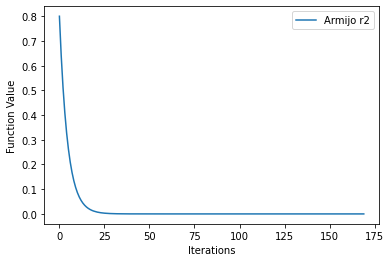


final step size : 3.351951982485684e-17  
nombre d'iteration Armijo:  171


In [51]:
from time import time

import numpy as np
from matplotlib import pyplot as plt


def armijo(max_iters=200, A=None, b=None):
    b = b if b is not None else np.matrix([[1], [2], [3], [4], [5]])
    A = A if A is not None else np.matrix([[3, -1, 0, 0, 0],
                                           [-1, 12, -1, 0, 0],
                                           [0, -1, 24, -1, 0],
                                           [0, 0, -1, 48, -1],
                                           [0, 0, 0, -1, 96]])

    n = len(b)

    def f(x):
        """
        calculate f(x) with input x
        """
        return (1 / 2 * np.dot((np.dot(x.T, A)), x) - np.dot(b.T, x)).item()

    def df(x):
        """
        calculate f'(x) with input x
        """
        return A * x + b

    def grad_desc_exact():
        """
        gradient descent with exact line minimization
        """
        x = np.matrix(np.zeros((n, 1)))
        fun_values_exact = [f(x)]
        for i in range(max_iters - 1):
            # calculate derivative
            d = df(x)
            # calculate step size
            alpha = (d.T * d / (d.T * A * d)).item()
            # update x
            x -= alpha * d
            # get new function value
            fun_values_exact.append(f(x))
            return fun_values_exact

    def grad_desc_armijo(alpha, beta=0.5, sigma=0.9):
        """
        gradient descent with Armijo step size rule
        """
        fun_values_exact = grad_desc_exact()
        x = np.matrix(np.zeros((n, 1)))
        fun_values_armijo = [f(x)]
        curr_iter = 1
        for i in range(max_iters - 1):
            # calculate derivative
            d = df(x)
            # backtracking line search
            cur_alpha = alpha
            cur_value = f(x + cur_alpha * d)
            while cur_value > f(x) + sigma * cur_alpha * d.T * d:
                cur_alpha *= beta
                cur_value = f(x + cur_alpha * d)
            # update x
            x -= cur_alpha * d
            # get new function value
            fun_values_armijo.append(cur_value)
            if cur_value == fun_values_armijo[-1]:
                curr_iter = curr_iter
            else:
                curr_iter += 1
        print('nombre d\'iteration Armijo ', curr_iter)
        return fun_values_armijo

    results = grad_desc_armijo(alpha=1)
    plt.plot(range(10), results[:10], label='Armijo rn')
    plt.legend(loc="best")
    plt.xlabel("Iterations")
    plt.ylabel("Function Value")
    plt.show()
    return results


def armijo_r2(f=None, dfx1=None, dfx2=None, t=1, count=1, x0=None, alpha=0.3, beta=0.8):
    f = f if f is not None else lambda x: ((x[0] - 1) ** 2 + (x[1] - 4) ** 2)
    dfx1 = dfx1 if dfx1 is not None else lambda x: (2 * x[0])
    dfx2 = dfx2 if dfx2 is not None else lambda x: (2 * x[1])
    x0 = x0 if x0 is not None else np.array([2, 3])

    def backtrack(x0, dfx1, dfx2, t, alpha, beta, count):
        fun_value = []
        while (f(x0) - (f(x0 - t * np.array([dfx1(x0), dfx2(x0)])) + alpha * t * np.dot(np.array([dfx1(x0), dfx2(x0)]),
                                                                                        np.array([dfx1(x0),
                                                                                                  dfx2(x0)])))) < 0:
            t *= beta
            fun_value.append(t)
            count += 1
        return t, count, fun_value

    t, count, fun_value = backtrack(x0, dfx1, dfx2, t, alpha, beta, count)
    plt.plot(range(len(fun_value)), fun_value, label='Armijo r2')
    plt.legend(loc="best")
    plt.xlabel("Iterations")
    plt.ylabel("Function Value")
    plt.show()
#    print("\nfinal step size :", t, " \nnombre d'iteration Armijo: ", count)
    print("\nfinal step size :", t, " \nnombre d'iteration Armijo: ", count)

#    return fun_value
    return None

armijo_r2()
# c1 = time()
# print("armijo r2 :", armijo_r2())
# print('temps de execution Armijo r2 : ', time() - c1)

# c = time()
# print("armijo rn :", armijo())
# print('temps de execution Armijo : ', time() - c)

In [52]:
def WolfeLineSearch(f, f_grad, xk, pk, c1=1e-4, c2=0.9, amax=None, maxiter=10):


    def phi(alpha):
        return f(xk + alpha * pk)

    def derphi(alpha):
        return np.dot(f_grad(xk + alpha * pk), pk)

    alpha_star, phi_star, derphi_star = WolfeLineSearch2(phi, derphi, c1, c2, amax, maxiter)

    if derphi_star is None:
        warn('The line search algorithm did not converge', RuntimeWarning)

    return alpha_star, phi_star


def WolfeLineSearch2(phi, derphi, c1=1e-4, c2=0.9, amax=None, maxiter=10):

    phi0 = phi(0.)
    derphi0 = derphi(0.)

    alpha0 = 0
    alpha1 = 1.0

    if amax is not None:
        alpha1 = min(alpha1, amax)

    phi_a1 = phi(alpha1)

    phi_a0 = phi0
    derphi_a0 = derphi0

    for i in range(maxiter):
        if alpha1 == 0 or (amax is not None and alpha0 == amax):
            alpha_star = None
            phi_star = phi0
            derphi_star = None

            if alpha1 == 0:
                msg = 'Les erreurs d arrondi empechent la recherche de ligne de converger'
            else:
                msg = "L algorithme de recherche de ligne n a pas pu trouver de solution " + \
                      "inférieure ou égale à max: %s" % amax

            warn(msg, RuntimeWarning)
            break

        if (phi_a1 > phi0 + c1 * alpha1 * derphi0) or \
                ((phi_a1 >= phi_a0) and (i > 1)):
            alpha_star, phi_star, derphi_star = \
                _zoom(alpha0, alpha1, phi_a0,
                      phi_a1, derphi_a0, phi, derphi,
                      phi0, derphi0, c1, c2)
            break

        derphi_a1 = derphi(alpha1)
        if (abs(derphi_a1) <= -c2 * derphi0):
            alpha_star = alpha1
            phi_star = phi_a1
            derphi_star = derphi_a1
            break

        if (derphi_a1 >= 0):
            alpha_star, phi_star, derphi_star = \
                _zoom(alpha1, alpha0, phi_a1,
                      phi_a0, derphi_a1, phi, derphi,
                      phi0, derphi0, c1, c2)
            break

        alpha2 = 2 * alpha1
        if amax is not None:
            alpha2 = min(alpha2, amax)
        alpha0 = alpha1
        alpha1 = alpha2
        phi_a0 = phi_a1
        phi_a1 = phi(alpha1)
        derphi_a0 = derphi_a1

    else:
        alpha_star = alpha1
        phi_star = phi_a1
        derphi_star = None
        warn('Lalgorithme de recherche de ligne n a pas convergé', RuntimeWarning)

    return alpha_star, phi_star, derphi_star

def _quadmin(a, fa, fpa, b, fb):

    with np.errstate(divide='raise', over='raise', invalid='raise'):
        try:
            D = fa
            C = fpa
            db = b - a * 1.0
            B = (fb - D - C * db) / (db * db)
            xmin = a - C / (2.0 * B)
        except ArithmeticError:
            return None
    if not np.isfinite(xmin):
        return None
    return xmin

def _zoom(a_lo, a_hi, phi_lo, phi_hi, derphi_lo,
          phi, derphi, phi0, derphi0, c1, c2):

    maxiter = 10
    i = 0
    delta1 = 0.2
    delta2 = 0.1
    phi_rec = phi0
    a_rec = 0
    while True:
        dalpha = a_hi - a_lo
        if dalpha < 0:
            a, b = a_hi, a_lo
        else:
            a, b = a_lo, a_hi

        if (i > 0):
            cchk = delta1 * dalpha
            a_j = _cubicmin(a_lo, phi_lo, derphi_lo, a_hi, phi_hi,
                            a_rec, phi_rec)
        if (i == 0) or (a_j is None) or (a_j > b - cchk) or (a_j < a + cchk):
            qchk = delta2 * dalpha
            a_j = _quadmin(a_lo, phi_lo, derphi_lo, a_hi, phi_hi)
            if (a_j is None) or (a_j > b-qchk) or (a_j < a+qchk):
                a_j = a_lo + 0.5*dalpha

        phi_aj = phi(a_j)
        if (phi_aj > phi0 + c1*a_j*derphi0) or (phi_aj >= phi_lo):
            phi_rec = phi_hi
            a_rec = a_hi
            a_hi = a_j
            phi_hi = phi_aj
        else:
            derphi_aj = derphi(a_j)
            if abs(derphi_aj) <= -c2*derphi0:
                a_star = a_j
                val_star = phi_aj
                valprime_star = derphi_aj
                break
            if derphi_aj*(a_hi - a_lo) >= 0:
                phi_rec = phi_hi
                a_rec = a_hi
                a_hi = a_lo
                phi_hi = phi_lo
            else:
                phi_rec = phi_lo
                a_rec = a_lo
            a_lo = a_j
            phi_lo = phi_aj
            derphi_lo = derphi_aj
        i += 1
        if (i > maxiter):
            # Failed to find a conforming step size
            a_star = None
            val_star = None
            valprime_star = None
            break
    return a_star, val_star, valprime_star


def Griewank(xs):
    d = len(xs)
    sqrts = np.array([np.sqrt(i + 1) for i in range(d)])
    cos_terms = np.cos(xs / sqrts)

    sigma = np.dot(xs, xs) / 4000
    pi = np.prod(cos_terms)
    return 1 + sigma - pi


def GriewankGrad(xs):
    d = len(xs)
    sqrts = np.array([np.sqrt(i + 1) for i in range(d)])
    cos_terms = np.cos(xs / sqrts)
    pi_coefs = np.prod(cos_terms) / cos_terms

    sigma = 2 * xs / 4000
    pi = pi_coefs * np.sin(xs / sqrts) * (1 / sqrts)
    return sigma + pi

In [53]:
from scipy.optimize import minimize,LinearConstraint,Bounds
import numpy as np
import numdifftools as nd

from scipy.optimize import linprog
import time

def min_fun(x):
    return (x[0]-1)**2 + (x[1]-4)**2


class frank_wolfe():

    def __init__(self, min_fun, A, b, bounds, x0, iterations=100):
        self.min_fun = min_fun
        self.A = A
        self.b = b
        self.bounds = bounds
        self.x0 = x0
        self.iterations = iterations
        self.x_min = []
        self.f_min = 0
        self.x_t = []
        self.s_t = []
        self.f_t = []
        self.violation = 0
        self.time = 0

    def __repr__(self):
        out = 'f_min: ' + str(self.f_min) + '\n' + \
              'x_min: ' + str(self.x_min) + '\n' + \
              'violation: ' + str(self.violation) + '\n' + \
              'time: ' + str(self.time)
        return out

    def optimize(self):
        x = self.x0
        t1 = time.time()
        for i in range(0, self.iterations):
            gamma = 2 / (i + 2)
            grad_def = nd.Gradient(self.min_fun)
            grad = grad_def(x)
            update = linprog(grad, A_ub=self.A, b_ub=self.b, A_eq=None, b_eq=None, bounds=self.bounds,
                             method='interior-point', callback=None, x0=None,
                             options={'sym_pos': False, 'lstsq': True})

            s = update.x
            self.s_t.append(s)
            x = x + gamma * (s - x)
            self.f_t.append(self.min_fun(x))
            self.x_t.append(x)
        t2 = time.time()
        self.time = t2 - t1

        constraints = np.dot(self.A, x) - self.b
        self.violation = np.sum([i for i in constraints if i > 0])
        self.x_min = x
        self.f_min = self.f_t[-1]
        return self

constr_num = 2
var_num = 3

A = np.random.randint(-10,10, (constr_num,var_num))
ub = 10*np.ones(constr_num)

bounds=[(0,10) for i in range(0,var_num)]
x0 = np.random.randint(0,10,(var_num))


iterations = 200
fw = frank_wolfe(min_fun,A,ub,bounds,x0,iterations)
results = fw.optimize()


bounds = Bounds(np.zeros(var_num), 10*np.ones(var_num))
lb = -np.inf*np.ones(constr_num)
linear_constraint = LinearConstraint(A, lb, ub)

res = minimize(min_fun, x0, method='trust-constr', jac=nd.Gradient(min_fun),
                constraints=linear_constraint, bounds=bounds,
                options={'verbose': 0,'gtol': 1e-8, 'disp': True})

f_star = [res.fun for i in range(0,len(results.f_t))]

`gtol` termination condition is satisfied.
Number of iterations: 33, function evaluations: 23, CG iterations: 35, optimality: 4.45e-09, constraint violation: 0.00e+00, execution time: 0.13 s.


In [54]:
x, y = symbols('x y')

In [56]:
print(y)

y


In [58]:
x, y = symbols('x y')
fct2_exp = x**2 + y**4
a=sympy.expand(fct2_exp), x, y

In [59]:
a

(x**2 + y**4, x, y)

In [71]:
import sympy
from sympy import *

#----------------------------------------------------------------------------------------#
# Gradient Descent Implementation
class GradientDescent_RN():
    def __init__(self, l_rate=0.01, max_iter=1000, precision=1e-5, function=None,variables=None):
        self.l_rate = l_rate  # learning rate
        self.max_iter = max_iter  # Nb max d'iteration
        self.precision = precision  # stop prev_step_sizeition = precision
        self.function = function # function 
        self.variables = variables # symbols x,y,z ...

    # Input : Array of values : expl = (1,2,3,4)
    # Input : symbol_deriv = exemple calculate partial deriv in x 
    def _partial_derivative(self, symbol_deriv, values):
        if self.function and self.variables and values:
            dif1 = diff(self.function,symbol_deriv)
            new_list_tuple = []
            i = 0
            for ar in values:
                new_list_tuple.append((self.variables[i],ar))
                i+=1
            res = dif1.subs(new_list_tuple)
        del new_list_tuple
        return res

    def _calculate_fct(self, values):
        if self.function and self.variables and values:
            new_list_tuple = []
            i = 0
            for ar in values:
                new_list_tuple.append((self.variables[i],ar))
                i+=1
        return self.function.subs(new_list_tuple)

    def start_gradient(self):
        n_dimension = len(self.variables)
        listofvars = [1.1] * n_dimension
        res = self._calculate_fct(listofvars)  # calculate f(x1,x2,..) = res
        prev_step_size = 1  # start with prev_step_size greater than eps (assumption)
        nb_iter = 0  # init iteration counter
        prev_res = res  # init previous res
        while prev_step_size > self.precision and nb_iter < self.max_iter:
            for i in range(n_dimension):
                listofvars[i] = listofvars[i] - self.l_rate * self._partial_derivative(self.variables[i],listofvars)  # Make a small step down Xn
            res = self._calculate_fct(listofvars)
            nb_iter = nb_iter + 1  # iteration count
            prev_step_size = abs(prev_res - res)  # Change in res
            prev_res = res  # Store current res value in prev_res
        if nb_iter == self.max_iter:
            print("Maximum Iterations Exceeded : Could not find local Mininmun.")
            return
        print("Iterations : ", nb_iter)
        new_list = [str(self.variables[idx]) + " = "+ str(round(val,2)) for idx, val in enumerate(listofvars)]
        print("Found Local Minimum = {}; in points {}".format(res,new_list))


#----------------------------------------------------------------------------------------#
# Functions

# Function fct2
def fct2():
    x, y = symbols('x y')
    fct2_exp = x**2 + y**4
    return sympy.expand(fct2_exp), x, y

# Rosenbrock Function
def fct3():
    x, y = symbols('x y')
    fct3_exp = (1-x)**2 + 100 * (y-x**2)**2
    return sympy.expand(fct3_exp), x, y


#----------------------------------------------------------------------------------------#
# Main





In [64]:
fn[0]

x**2 + y**4

In [72]:
sym = []
nbVar = input('Nombre de variables: ')
for i in range(int(nbVar)):
  var = input("Entrez la variable numéro " + str(i+1) + ": ")
  sym.append(Symbol(var))

Nombre de variables: 3
Entrez la variable numéro 1: x
Entrez la variable numéro 2: y
Entrez la variable numéro 3: z


In [73]:
sym

[x, y, z]

In [74]:
function= sympify(input("Entrez la fonction: "))

Entrez la fonction: x+y**2+z


In [75]:
function

x + y**2 + z

In [77]:
gradient_fct2 = GradientDescent_RN(function=function,variables=sym)
gradient_fct2.start_gradient()

Maximum Iterations Exceeded : Could not find local Mininmun.
